# Zajęcie 3 (2024)

# PCA i wizualizacja skupień

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


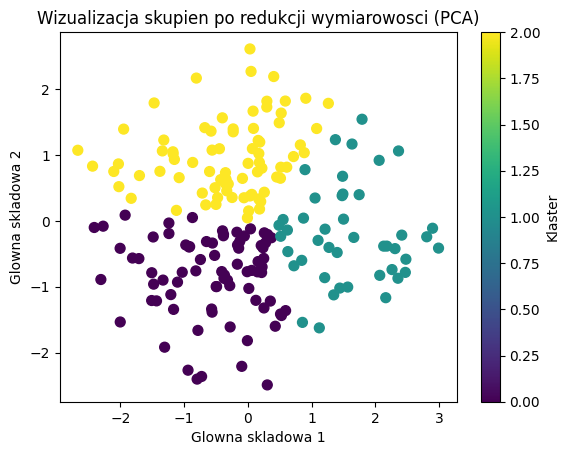

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generowanie przykladowych danych
np.random.seed(42)
data = np.random.rand(200, 5)  # 200 punktow w 5 wymiarach

# Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Redukcja wymiarowosci za pomoca PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Klasteryzacja k-means (na potrzeby wizualizacji)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_pca)

# Wizualizacja wynikow
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('Glowna skladowa 1')
plt.ylabel('Glowna skladowa 2')
plt.title('Wizualizacja skupien po redukcji wymiarowosci (PCA)')
plt.colorbar(label='Klaster')
plt.show()

# Klasteryzacja k-means

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


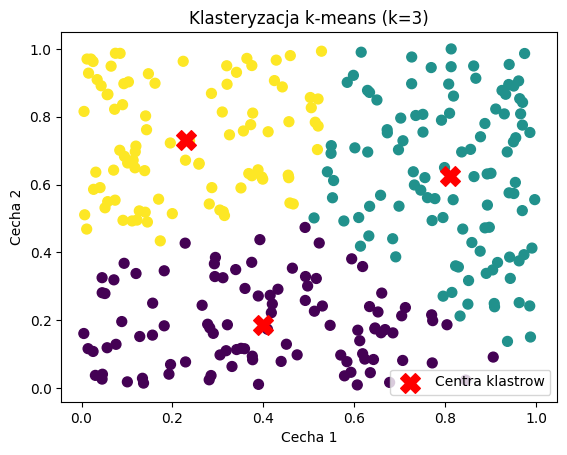

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generowanie przykladowych danych
np.random.seed(42)
data = np.random.rand(300, 2)  # 300 punktow w 2 wymiarach

# Klasteryzacja k-means
k = 3  # liczba klastrow
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(data)

# Wizualizacja wynikow
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centra klastrow')
plt.title(f'Klasteryzacja k-means (k={k})')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()
plt.show()

# Klasteryzacja hierarchiczna

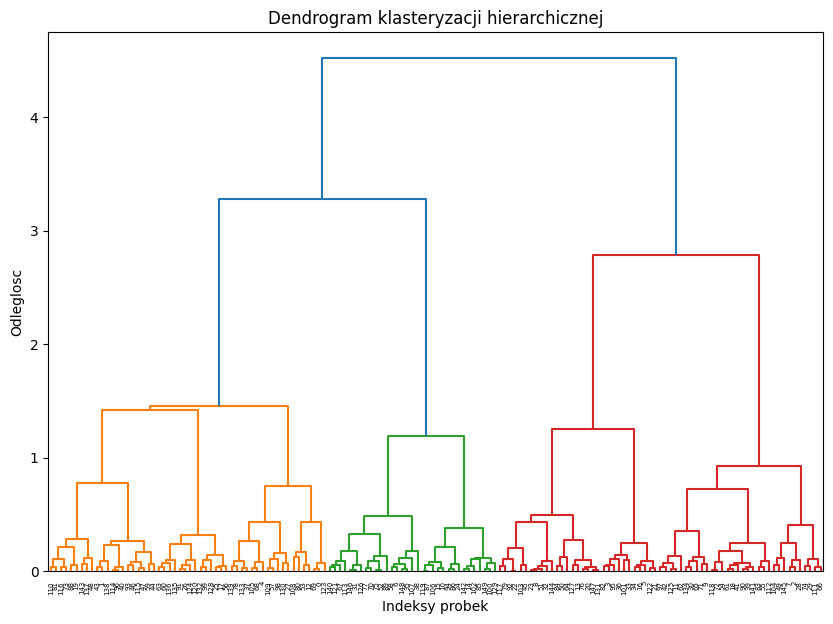

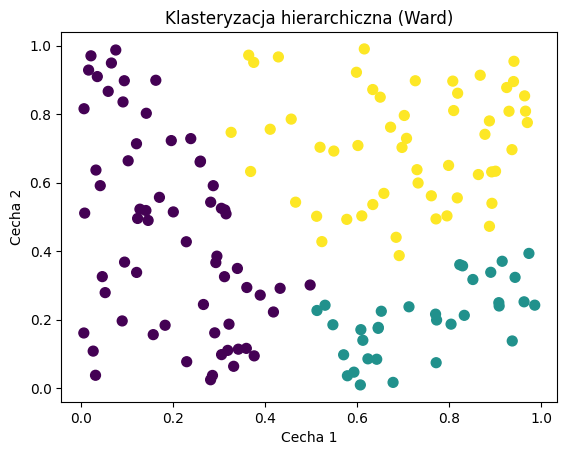

In [8]:
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Generowanie przykladowych danych
np.random.seed(42)
data = np.random.rand(150, 2)  # 150 punktow w 2 wymiarach

# Klasteryzacja hierarchiczna
linked = linkage(data, method='ward')  # Uzycie metody Ward

# Wizualizacja dendrogramu
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram klasteryzacji hierarchicznej')
plt.xlabel('Indeksy probek')
plt.ylabel('Odleglosc')
plt.show()

# Wyodrebnienie klastrow na wybranym poziomie
clusters = fcluster(linked, t=3, criterion='maxclust')

# Wizualizacja skupien
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Klasteryzacja hierarchiczna (Ward)')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.show()